In [1]:
import asset_loader

from qiskit import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *
from tqdm import tqdm
import itertools


from importlib import reload

c:\Users\otkul\sintef\repo\qaoa\examples\PortfolioOptimization\asset_loader.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=-30)


64


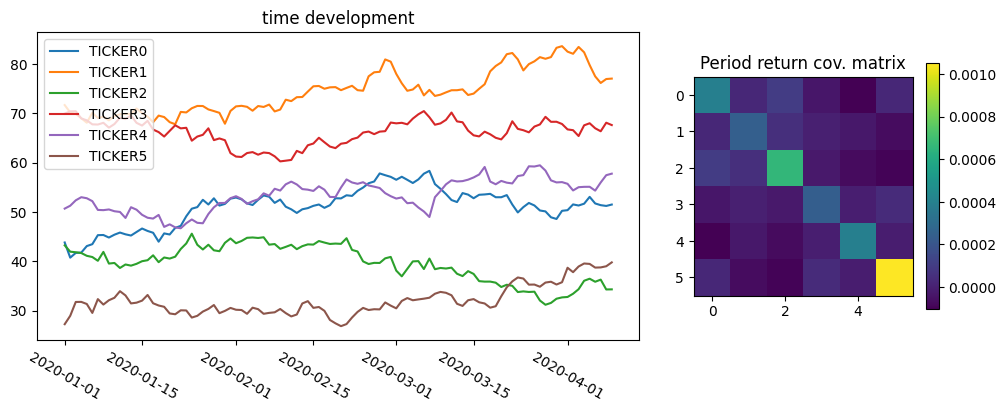

In [2]:
reload(asset_loader)
assets = asset_loader.AssetData(6, 100, seed=13)
assets.plotAssets()

params = {
    "risk": 0.5,
    "budget": 2,
    "penalty": 4,
    "cov_matrix": assets.cov_matrix,
    "exp_return": assets.exp_return,
    "usebarrier": True,
}
print(2**assets.N)

In [3]:
from qaoa import QAOA, problems, mixers

qaoa_portopt = QAOA(
    problem=problems.PortfolioOptimization, mixer=mixers.XY, params=params
)

Its now computing the feasible subspace


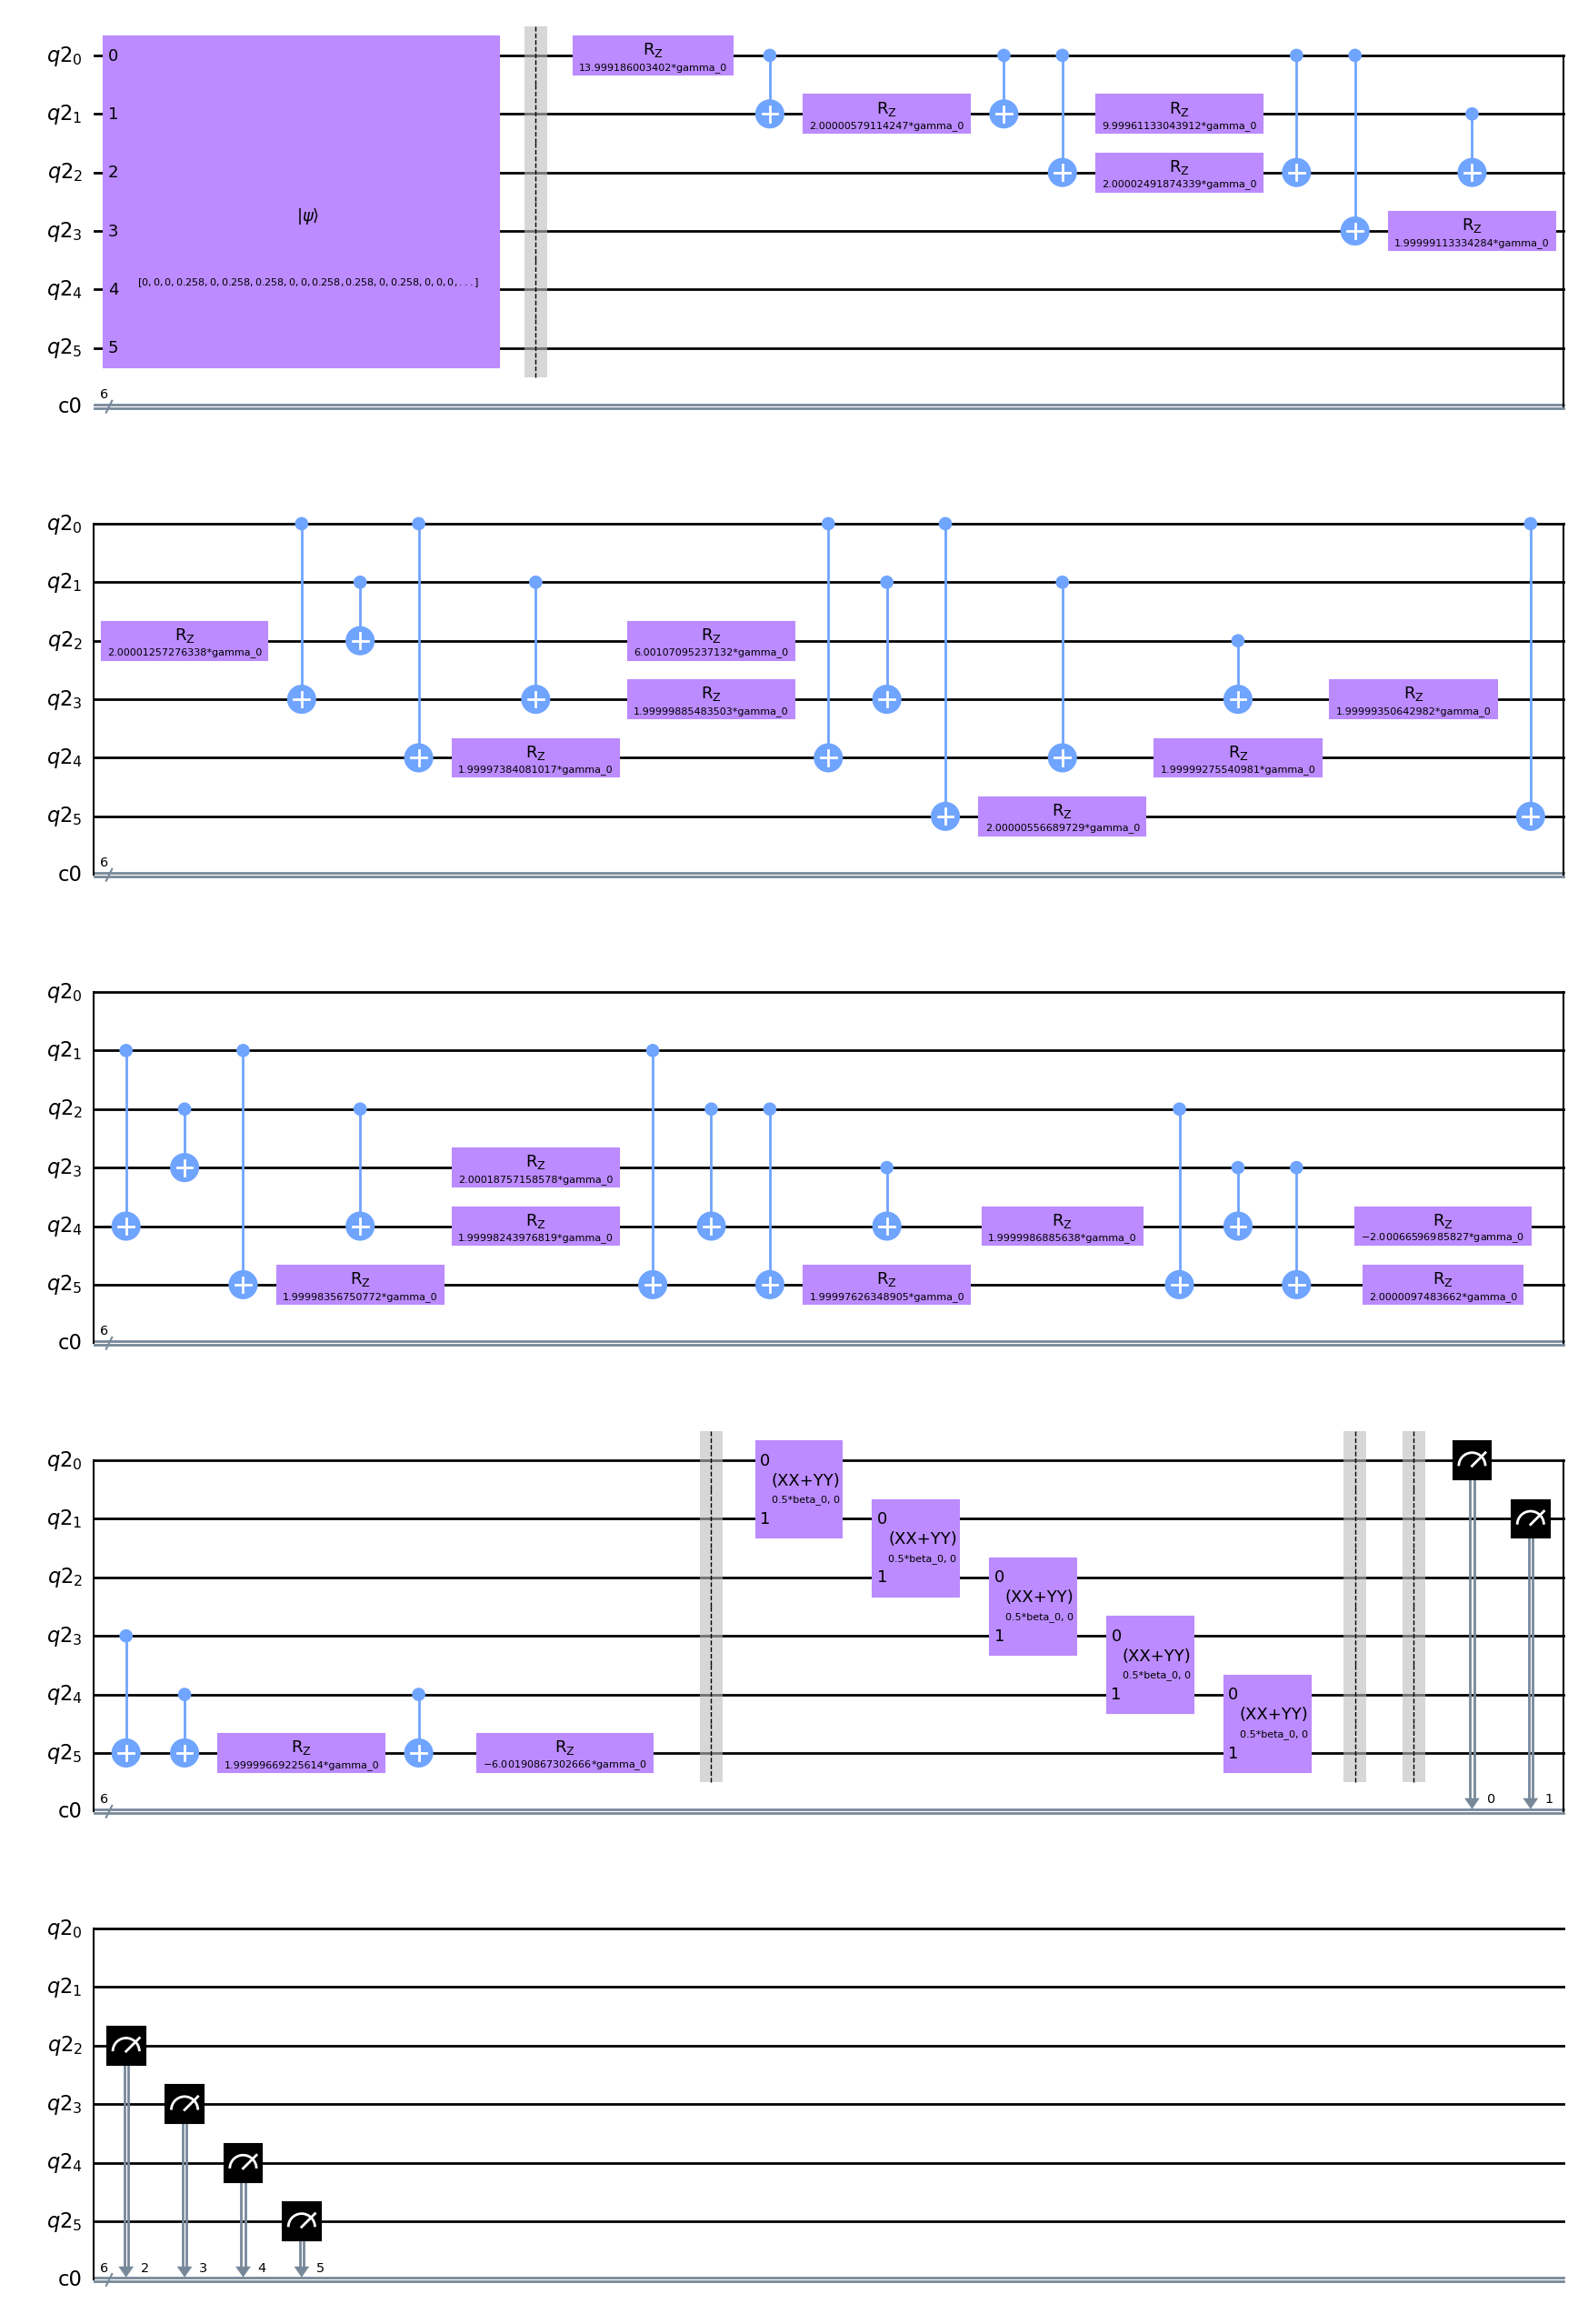

In [4]:
qaoa_portopt.createParameterizedCircuit(1)
display(qaoa_portopt.parameterized_circuit.draw(output="mpl"))

In [5]:
print("solutions:")
best_sol = None
best_cost = None
for s in ["".join(i) for i in itertools.product("01", repeat=assets.N)]:
    c = qaoa_portopt.cost(s)
    if best_sol is None:
        best_sol = s
        best_cost = c
    elif c > best_cost:
        best_sol = s
        best_cost = c

    if qaoa_portopt.isFeasible(s):
        print(s, c)
    else:
        print(s, "\t", c)

print("--------------------")
print("Best sol is " + best_sol + " with cost " + str(best_cost))

solutions:
000000 	 -16.0
000001 	 -3.9961826539466863
000010 	 -3.998681291258883
000011 0.005149285769853407
000100 	 -4.000341395451567
000101 0.0034369571369659013
000110 0.000982559034333974
000111 	 -3.9952258574017137
001000 	 -4.002333065994415
001001 0.0015792261027094412
001010 -0.0009441163260390795
001011 	 -3.9970185932535003
001100 -0.0026484871652812103
001101 	 -3.998775188532939
001110 	 -4.001254291752133
001111 	 -15.99736776214435
010000 	 -3.9992716588144965
010001 0.0046114172079469995
010010 0.0020760282873837355
010011 	 -3.99402766471475
010100 0.00039152639381967447
010101 	 -3.9957643910485316
010110 	 -3.9982555407595157
010111 	 -15.994398227226426
011000 -0.0016550158624220046
011001 	 -3.9976769937961762
011010 	 -4.000237087833277
011011 	 -15.996245834791608
011100 	 -4.001965856373403
011101 	 -15.998026827771923
011110 	 -16.000542682599487
011111 	 -35.996590423022596
100000 	 -3.998367003059391
100001 0.005428075404783073
100010 0.003056342441034587

## Sample cost landscape

In [6]:
qaoa_portopt.sample_cost_landscape(
    angles={"gamma": [0, np.pi, 50], "beta": [0, np.pi, 40]}
)

2023-09-06 11:22:46 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
2023-09-06 11:22:46 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2023-09-06 11:22:46 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2023-09-06 11:22:46 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2023-09-06 11:23:00 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2023-09-06 11:23:00 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape


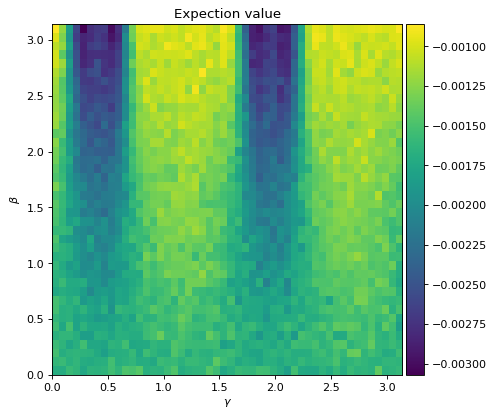

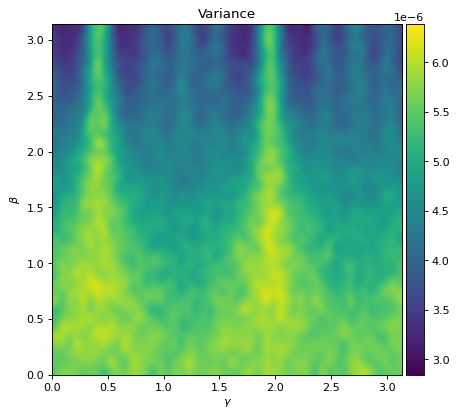

In [7]:
def plotLandscape(field, title, interpolation="bicubic"):
    f = plt.figure(figsize=(6, 6), dpi=80, facecolor="w", edgecolor="k")
    _ = plt.xlabel(r"$\gamma$")
    _ = plt.ylabel(r"$\beta$")
    ax = plt.gca()
    _ = plt.title(title)
    im = ax.imshow(
        field, interpolation=interpolation, origin="lower", extent=[0, np.pi, 0, np.pi]
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    _ = plt.colorbar(im, cax=cax)


plotLandscape(qaoa_portopt.E, "Expection value", interpolation="None")
# plotLandscape(qaoa_portopt.E, r'CVaR with $\alpha$='+str(qaoaec_cvar.params["alpha"])) #, interpolation="None")
plotLandscape(qaoa_portopt.Var, "Variance")

In [8]:
maxdepth = 10
for i in tqdm(range(maxdepth)):
    qaoa_portopt.increase_depth()

  0%|          | 0/10 [00:00<?, ?it/s]

2023-09-06 11:23:01 [info     ] cost(depth 1 = -0.003459127562079927 file=qaoa.qaoa func=increase_depth


 10%|█         | 1/10 [00:00<00:07,  1.26it/s]

2023-09-06 11:23:03 [info     ] cost(depth 2 = -0.004499200949201924 file=qaoa.qaoa func=increase_depth


 20%|██        | 2/10 [00:02<00:12,  1.52s/it]

2023-09-06 11:23:06 [info     ] cost(depth 3 = -0.0033472067098776204 file=qaoa.qaoa func=increase_depth


 30%|███       | 3/10 [00:06<00:16,  2.38s/it]

2023-09-06 11:23:14 [info     ] cost(depth 4 = -0.0038971882740024837 file=qaoa.qaoa func=increase_depth


 40%|████      | 4/10 [00:13<00:25,  4.25s/it]

2023-09-06 11:23:23 [info     ] cost(depth 5 = -0.003961786746516068 file=qaoa.qaoa func=increase_depth


 50%|█████     | 5/10 [00:22<00:30,  6.03s/it]

2023-09-06 11:23:35 [info     ] cost(depth 6 = -0.0029210209481500575 file=qaoa.qaoa func=increase_depth


 60%|██████    | 6/10 [00:34<00:32,  8.18s/it]

2023-09-06 11:23:52 [info     ] cost(depth 7 = -0.0036831341053988613 file=qaoa.qaoa func=increase_depth


 70%|███████   | 7/10 [00:51<00:33, 11.07s/it]

2023-09-06 11:24:14 [info     ] cost(depth 8 = -0.004024790306841763 file=qaoa.qaoa func=increase_depth


 80%|████████  | 8/10 [01:13<00:28, 14.36s/it]

2023-09-06 11:24:40 [info     ] cost(depth 9 = -0.0037083869304023057 file=qaoa.qaoa func=increase_depth


 90%|█████████ | 9/10 [01:39<00:18, 18.11s/it]

2023-09-06 11:25:13 [info     ] cost(depth 10 = -0.004118080962165947 file=qaoa.qaoa func=increase_depth


100%|██████████| 10/10 [02:12<00:00, 13.28s/it]


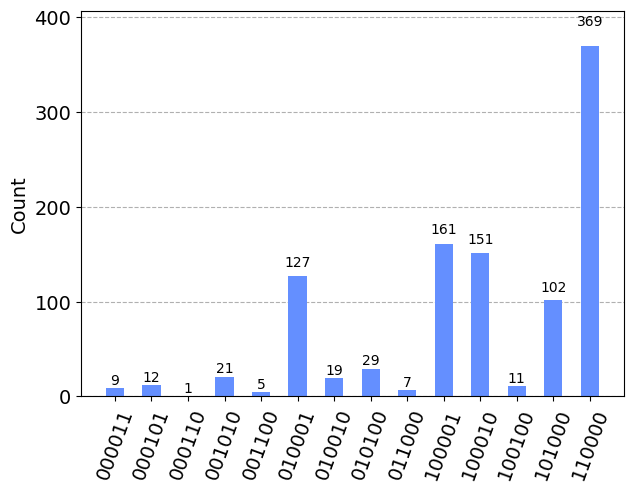

In [9]:
hist = qaoa_portopt.hist(qaoa_portopt.angles_hist["d" + str(maxdepth) + "_final"])
plot_histogram(hist)

In [10]:
sorted_hist = dict(sorted(hist.items(), key=lambda item: item[1], reverse=True))

print("Classical best result: ", (best_sol, best_cost))

i = 0
for s, freq in sorted_hist.items():
    if i > 20:
        break
    if s == best_sol:
        print(str(i) + " -->\t", qaoa_portopt.cost(s), s, freq)
    elif qaoa_portopt.isFeasible(s):
        print(str(i) + "\t", qaoa_portopt.cost(s), s, freq)
    else:
        print(str(i) + "\t\t", qaoa_portopt.cost(s), s, freq)
    i = i + 1

Classical best result:  ('100001', 0.005428075404783073)
0	 0.0023381735562253425 110000 369
1 -->	 0.005428075404783073 100001 161
2	 0.0030563424410345874 100010 151
3	 0.0046114172079469995 010001 127
4	 -0.0007997440273825873 101000 102
5	 0.00039152639381967447 010100 29
6	 -0.0009441163260390795 001010 21
7	 0.0020760282873837355 010010 19
8	 0.0034369571369659013 000101 12
9	 0.0013270681176713595 100100 11
10	 0.005149285769853407 000011 9
11	 -0.0016550158624220046 011000 7
12	 -0.0026484871652812103 001100 5
13	 0.000982559034333974 000110 1


In [11]:
def cost(qaoa_portopt, string, penalize=True):
    risk = qaoa_portopt.params.get("risk")
    budget = qaoa_portopt.params.get("budget")
    cov_matrix = qaoa_portopt.params.get("cov_matrix")
    exp_return = qaoa_portopt.params.get("exp_return")
    penalty = qaoa_portopt.params.get("penalty", 0.0)

    x = np.array(list(map(int, string)))
    cost = risk * (x.T @ cov_matrix @ x) - exp_return.T @ x
    if penalize:
        cost += penalty * (x.sum() - budget) ** 2

    return -cost


for s in ["111111", "000000", "010101", "011000", "010001"]:
    print(
        cost(qaoa_portopt, s),
        qaoa_portopt.cost(s),
        qaoa_portopt.problem.cost_nonQUBO(s),
    )

-63.99496242982665 -63.99496242982666 -63.99496242982665
-16.0 -16.0 -16.0
-3.995764391048522 -3.9957643910485316 -3.995764391048522
-0.0016550158624250885 -0.0016550158624220046 -0.0016550158624250885
0.004611417207942098 0.0046114172079469995 0.004611417207942098
